In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./additional/TitanicDataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId - id пассажира
Survived - выжил (1) / не выжил (0)
Pclass - класс билета (1, 2, 3)
Name - фамилия, имя
Sex - пол
Age - возраст
SibSp - количество братьев/сестёр или супругов на борту
Parch - количество родителей/детей на борту
Ticket - номер билета
Fare - стоимость билета
Cabin - номер каюты
Embarked - порт посадки

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Пропуски: embarked(2), age(177), cabin(687).
Приведём embarked и sex к числовому типу:

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Приводим признак пол к числовому типу
sex_map = {'male': 0, 'female': 1}
df['Sex'] = list(map(lambda x: sex_map[x], df['Sex']))

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


Порты посадки: S - 2, C - 0, Q - 1, пропуск - (-1).

In [9]:
# Приводим признак порт посадки к числовому типу
df['Embarked'] = pd.Categorical(df['Embarked'])
df['Embarked'] = df['Embarked'].cat.codes
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0


In [10]:
df['Embarked'].unique()

array([ 2,  0,  1, -1], dtype=int8)

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [12]:
# Добавляем столбец с фамилией для удобства поиска родственников
df['Surname'] = df['Name'].str.split(',').str[0]

In [13]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2,Futrelle
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,2,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,2,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,2,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,0,Behr


Доля выживших по портам посадки (игнорируем (-1) - пропуски):

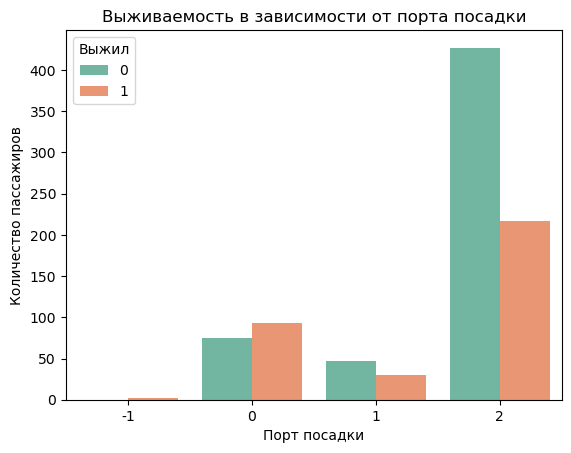

In [14]:
# Визуализация выживших по портам посадки
sns.countplot(
    x="Embarked",
    data=df,
    hue="Survived",
    palette="Set2"
)

plt.title("Выживаемость в зависимости от порта посадки")
plt.xlabel("Порт посадки")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил")
plt.show()

In [15]:
# Расчёт доли выживших по портам посадки
df.groupby('Embarked')['Survived'].mean()

Embarked
-1    1.000000
 0    0.553571
 1    0.389610
 2    0.336957
Name: Survived, dtype: float64

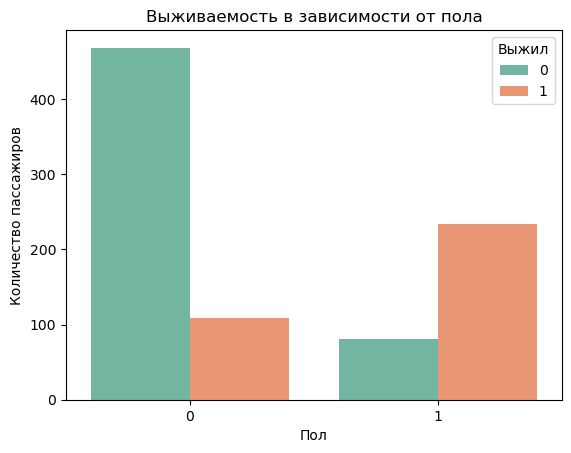

In [16]:
# Визуализация доли выживших по полу
sns.countplot(
    x="Sex",
    data=df,
    hue="Survived",
    palette="Set2"
)

plt.title("Выживаемость в зависимости от пола")
plt.xlabel("Пол")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил")
plt.show()

In [17]:
# Доля выживших среди мужчин и женщин в числах
df.groupby('Sex')['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

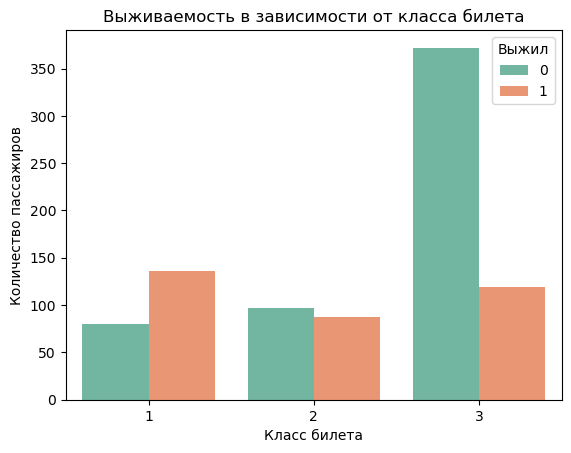

In [18]:
# Визуализация доли выживших по классу билета
sns.countplot(
    x="Pclass",
    data=df,
    hue="Survived",
    palette="Set2"
)

plt.title("Выживаемость в зависимости от класса билета")
plt.xlabel("Класс билета")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил")
plt.show()

In [19]:
# Доля выживших по классу билета в числах
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

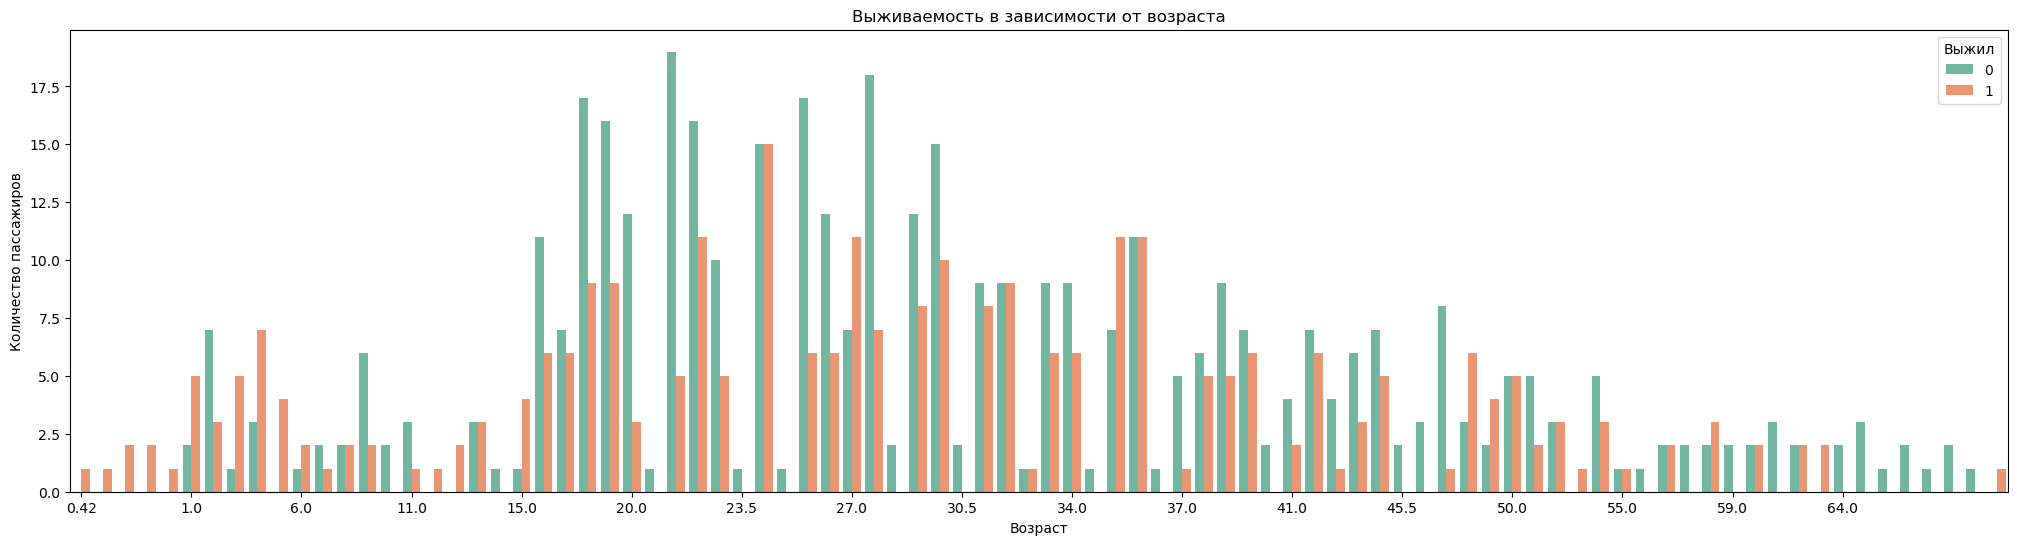

In [20]:
# Визуализация выживаемости в зависимости от возраста
plt.figure(figsize=(25, 6))

sns.countplot(
    x="Age",
    data=df,
    hue="Survived",
    palette="Set2"
)

plt.title("Выживаемость в зависимости от возраста")
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.legend(title="Выжил")

plt.xticks(range(0, int(df["Age"].max()) + 1, 5))
plt.show()

In [21]:
# Доля выживших детей
child_survival_ratio = df[df['Age'] < 18].groupby(lambda x: 'Children')['Survived'].mean()
child_survival_ratio

Children    0.539823
Name: Survived, dtype: float64

In [22]:
# Доля выживших взрослых
adult_survival_ratio = df[(df['Age'] >= 18) & (df['Age'] < 60)].groupby(lambda x: 'Adults')['Survived'].mean()
adult_survival_ratio

Adults    0.386087
Name: Survived, dtype: float64

In [23]:
# Доля выживших стариков
elderly_survival_ratio = df[df['Age'] >= 60].groupby(lambda x: 'Elderly')['Survived'].mean()
elderly_survival_ratio

Elderly    0.269231
Name: Survived, dtype: float64

<Axes: xlabel='Fare', ylabel='Survived'>

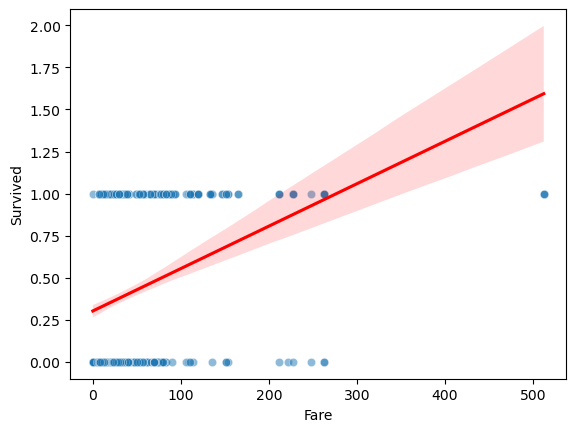

In [24]:
# Визуализация зависимости выживаемости от стоимости билета (линия тренда)
sns.scatterplot(x='Fare', y='Survived', data=df, alpha=0.5)
sns.regplot(x='Fare', y='Survived', data=df, scatter=False, color='red')

<Axes: xlabel='FareGroup', ylabel='Survived'>

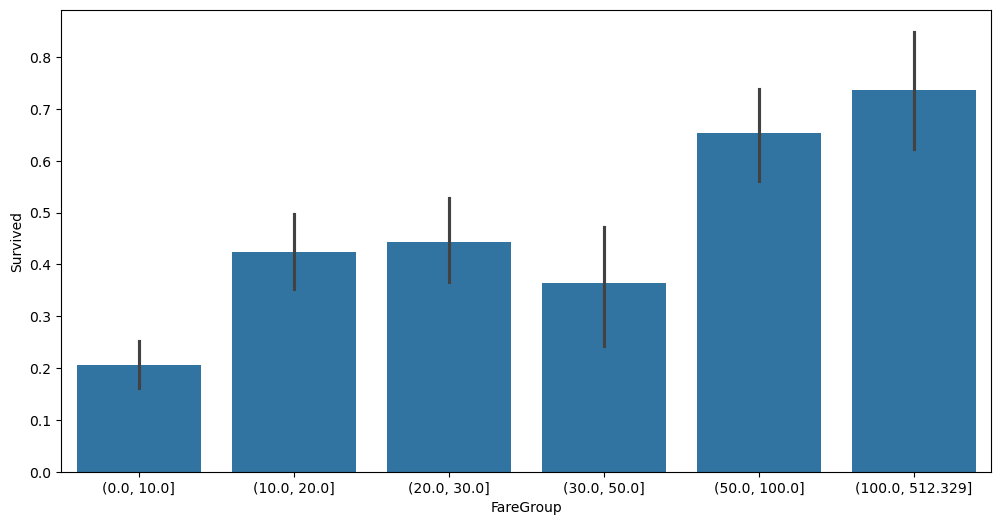

In [25]:
# Визуализация выживаемости по стоимости билета (в разбивке по группам)
df['FareGroup'] = pd.cut(df['Fare'], bins=[0, 10, 20, 30, 50, 100, df['Fare'].max()])
plt.figure(figsize=(12, 6))
sns.barplot(x='FareGroup', y='Survived', data=df)

In [26]:
# Расчёт доли выживших по группам стоимости билета
fare_bins = [0, 10, 20, 30, 50, 100, df['Fare'].max()]
fare_labels = ['0–10', '10–20', '20–30', '30–50', '50–100', '100+']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)

# Группируем по интервалам и считаем среднюю выживаемость
fare_survival_stats = df.groupby('FareGroup')['Survived'].agg(['count', 'mean'])

fare_survival_stats.columns = ['Количество пассажиров', 'Доля выживших']

print(fare_survival_stats)

           Количество пассажиров  Доля выживших
FareGroup                                      
0–10                         321       0.205607
10–20                        179       0.424581
20–30                        142       0.443662
30–50                         74       0.364865
50–100                       107       0.654206
100+                          53       0.735849


C:\Users\gorod\AppData\Local\Temp\ipykernel_14836\4037917259.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_stats = df.groupby('FareGroup')['Survived'].agg(['count', 'mean'])


Теперь анализируем в контексте семей: если хотя бы одна из колонок SibSp, Parch не равна 0, то у пассажира есть родственники на борту. В таком случае ищем людей с такой же фамилией и отличными от нуля признаками SibSp, Parch и смотрим, выжили они или нет.

In [27]:
# Фильтруем пассажиров с родственниками
has_family = df[(df['SibSp'] > 0) | (df['Parch'] > 0)]

# Проходим по каждому такому пассажиру
for idx, passenger in has_family.iterrows():
    surname = passenger['Surname']
    passenger_id = passenger['PassengerId']
    sibsp = passenger['SibSp']
    parch = passenger['Parch']
    
    # Статус самого пассажира
    passenger_status = "Выжил" if passenger['Survived'] == 1 else "Не выжил"
    
    print(f"\n🧍 Пассажир: {passenger['Name']} (ID: {passenger_id})")
    print(f"Фамилия: {surname}")
    print(f"Статус: {passenger_status}")
    print(f"SibSp: {sibsp}, Parch: {parch}")
    
    # Ищем родственников с той же фамилией, исключая самого пассажира
    relatives = df[(df['Surname'] == surname) & (df['PassengerId'] != passenger_id)]
    
    if not relatives.empty:
        print(f"👨‍👩‍👧 Найдено родственников: {len(relatives)}")
        print("Выжили ли они:")
        for _, relative in relatives.iterrows():
            status = "Выжил" if relative['Survived'] == 1 else "Не выжил"
            print(f"  - {relative['Name']} → {status} | SibSp: {relative['SibSp']}, Parch: {relative['Parch']}")
    else:
        print("❌ Родственники с такой фамилией не найдены.")


🧍 Пассажир: Braund, Mr. Owen Harris (ID: 1)
Фамилия: Braund
Статус: Не выжил
SibSp: 1, Parch: 0
👨‍👩‍👧 Найдено родственников: 1
Выжили ли они:
  - Braund, Mr. Lewis Richard → Не выжил | SibSp: 1, Parch: 0

🧍 Пассажир: Cumings, Mrs. John Bradley (Florence Briggs Thayer) (ID: 2)
Фамилия: Cumings
Статус: Выжил
SibSp: 1, Parch: 0
❌ Родственники с такой фамилией не найдены.

🧍 Пассажир: Futrelle, Mrs. Jacques Heath (Lily May Peel) (ID: 4)
Фамилия: Futrelle
Статус: Выжил
SibSp: 1, Parch: 0
👨‍👩‍👧 Найдено родственников: 1
Выжили ли они:
  - Futrelle, Mr. Jacques Heath → Не выжил | SibSp: 1, Parch: 0

🧍 Пассажир: Palsson, Master. Gosta Leonard (ID: 8)
Фамилия: Palsson
Статус: Не выжил
SibSp: 3, Parch: 1
👨‍👩‍👧 Найдено родственников: 3
Выжили ли они:
  - Palsson, Miss. Torborg Danira → Не выжил | SibSp: 3, Parch: 1
  - Palsson, Miss. Stina Viola → Не выжил | SibSp: 3, Parch: 1
  - Palsson, Mrs. Nils (Alma Cornelia Berglund) → Не выжил | SibSp: 0, Parch: 4

🧍 Пассажир: Johnson, Mrs. Oscar W (Elisa

In [28]:
# Групируем пассажиров по родственным связям, смотрим долю выживаемости
def family_group(row):
    if row['SibSp'] > 0 and row['Parch'] == 0:
        return 'Супруги / Братья, сёстры'
    elif row['Parch'] > 0 and row['SibSp'] == 0:
        return 'Родители / Дети'
    elif row['SibSp'] > 0 and row['Parch'] > 0:
        return 'Супруги / Братья, сёстры / Родители / Дети'
    else:
        return 'Без родственников'

df['FamilyType'] = df.apply(family_group, axis=1)

survival_by_family = df.groupby('FamilyType')['Survived'].agg(['count', 'mean'])

survival_by_family.columns = ['Количество пассажиров', 'Доля выживших']
survival_by_family

,Количество пассажиров,Доля выживших
FamilyType,,
Без родственников,537,0.303538
Родители / Дети,71,0.661972
"Супруги / Братья, сёстры",141,0.496454
"Супруги / Братья, сёстры / Родители / Дети",142,0.436620


In [29]:
# Всего выжило
df['Survived'].sum()

np.int64(342)

In [30]:
# Группируем более обширно (есть семья/нет), смотрим долю выживаемости
def family_group(row):
    if row['SibSp'] > 0 or row['Parch'] > 0:
        return 'Родственники на борту'
    else:
        return 'Без родственников'

df['FamilyType'] = df.apply(family_group, axis=1)

survival_by_family = df.groupby('FamilyType')['Survived'].agg(['count', 'mean'])

survival_by_family.columns = ['Количество пассажиров', 'Доля выживших']
survival_by_family

,Количество пассажиров,Доля выживших
FamilyType,,
Без родственников,537,0.303538
Родственники на борту,354,0.505650


Краткие выводу по анализу датасета:
- решено не использовать номер каюты Cabin (слишком большое число пропусков и нет возможности их заполнить)
- решено не использовать номер билета Ticket (он мог бы быть полезен для уточнения семейных связей, но было выбрано определять их по столбцам SibSb, Parch и созданному столбцу Surname)
- произведены группировки пассажиров по различным признакам и рассчитана доля выживаемости для каждой группы (пол, цена билета, возраст и т.д.)
- в ходе анализа в разрезе семей не было выявлено чёткой закономерности (типа "в семье все выживают либо все не выживают", "в семье выживают дети", "в супружеской паре выживает женщина"). однако доля выживших пассажиров с родственниками значительно выше, чем у тех, кто ехал один, поэтому решено всё же учесть факт наличия семьи на борту при расчёте вероятности выжить
- было принято решение разделить пассажиров по группам "без родственников", "с детьми/родителями на борту", "с сиблингами/супругами на борту", "и то, и другое" и рассчитать долю выживших для каждой группы, учитывать эти значения в модели